# Simple example for table-data with catalyst:
@DBusAI

In [1]:
#catalyst import
from catalyst.dl import SupervisedRunner
from catalyst.dl.callbacks import SchedulerCallback
from catalyst.contrib.optimizers import Lookahead
from catalyst.utils import set_global_seed

#torch 
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader

#others
import numpy as np
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import plt
%matplotlib inline
from collections import OrderedDict

lz4 not available, disabling compression. To install lz4, run `pip install lz4`.
wandb not available, switching to pickle. To install wandb, run `pip install wandb`.


### Reproduce all

In [3]:
SEED=2121
set_global_seed(SEED)

### Get some data

In [4]:
X,y = fetch_california_housing(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=2121,random_state=SEED)

### Dataset definition

In [5]:
mscl = StandardScaler()

In [6]:
x_train = mscl.fit_transform(x_train)
x_test = mscl.transform(x_test)

In [7]:
train_ds = TensorDataset(torch.FloatTensor(x_train),torch.FloatTensor(y_train.reshape(-1,1)))
test_ds = TensorDataset(torch.FloatTensor(x_test),torch.FloatTensor(y_test.reshape(-1,1)))

### DataLoader definition

In [8]:
batch = 120

train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True,num_workers=2)
test_dl = DataLoader(test_ds,batch_size=batch,shuffle=False,num_workers=2)

In [9]:
data = OrderedDict()
data['train'] = train_dl
data['valid'] = test_dl

### Define model

In [10]:
class Net(nn.Module):
    def __init__(self,num_features):
        super(Net,self).__init__()
        layers=[40,20]
        self.L1 = nn.Linear(num_features,layers[0])
        torch.nn.init.xavier_uniform_(self.L1.weight) 
        torch.nn.init.zeros_(self.L1.bias)
        
        self.L2 = nn.Linear(layers[0],layers[1])
        torch.nn.init.xavier_uniform_(self.L2.weight) 
        torch.nn.init.zeros_(self.L2.bias)
        
        self.L3 = nn.Linear(layers[1],1)
        torch.nn.init.xavier_uniform_(self.L3.weight) 
        torch.nn.init.zeros_(self.L3.bias)
    def forward(self,x):
        x = F.relu(self.L1(x))
        x = F.relu(self.L2(x))
        x = F.relu(self.L3(x))
        return x

In [11]:
model = Net(x_train.shape[1])

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
crit = nn.MSELoss()

In [14]:
runner = SupervisedRunner()
runner.train(model=model,
             criterion=crit,
             optimizer=optimizer,
             loaders=data,
             logdir='run',
             num_epochs=20)

[2019-09-05 10:45:46,854] 
0/20 * Epoch 0 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=174495.0694 | _timers/batch_time=0.0010 | _timers/data_time=0.0008 | _timers/model_time=0.0002 | loss=1.7247
0/20 * Epoch 0 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=182298.0869 | _timers/batch_time=0.0018 | _timers/data_time=0.0015 | _timers/model_time=0.0003 | loss=0.4278


I0905 10:45:46.854586 140734812878272 logging.py:110] 
0/20 * Epoch 0 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=174495.0694 | _timers/batch_time=0.0010 | _timers/data_time=0.0008 | _timers/model_time=0.0002 | loss=1.7247
0/20 * Epoch 0 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=182298.0869 | _timers/batch_time=0.0018 | _timers/data_time=0.0015 | _timers/model_time=0.0003 | loss=0.4278


[2019-09-05 10:45:47,203] 
1/20 * Epoch 1 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=177425.5178 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.3930
1/20 * Epoch 1 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=192055.6599 | _timers/batch_time=0.0017 | _timers/data_time=0.0014 | _timers/model_time=0.0002 | loss=0.3559


I0905 10:45:47.203205 140734812878272 logging.py:110] 
1/20 * Epoch 1 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=177425.5178 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.3930
1/20 * Epoch 1 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=192055.6599 | _timers/batch_time=0.0017 | _timers/data_time=0.0014 | _timers/model_time=0.0002 | loss=0.3559


[2019-09-05 10:45:47,568] 
2/20 * Epoch 2 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=174075.7473 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.3603
2/20 * Epoch 2 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=171890.6493 | _timers/batch_time=0.0020 | _timers/data_time=0.0017 | _timers/model_time=0.0003 | loss=0.3464


I0905 10:45:47.568791 140734812878272 logging.py:110] 
2/20 * Epoch 2 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=174075.7473 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.3603
2/20 * Epoch 2 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=171890.6493 | _timers/batch_time=0.0020 | _timers/data_time=0.0017 | _timers/model_time=0.0003 | loss=0.3464


[2019-09-05 10:45:47,934] 
3/20 * Epoch 3 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=174381.7525 | _timers/batch_time=0.0009 | _timers/data_time=0.0007 | _timers/model_time=0.0002 | loss=0.3567
3/20 * Epoch 3 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=159961.9908 | _timers/batch_time=0.0019 | _timers/data_time=0.0015 | _timers/model_time=0.0004 | loss=0.3103


I0905 10:45:47.934479 140734812878272 logging.py:110] 
3/20 * Epoch 3 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=174381.7525 | _timers/batch_time=0.0009 | _timers/data_time=0.0007 | _timers/model_time=0.0002 | loss=0.3567
3/20 * Epoch 3 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=159961.9908 | _timers/batch_time=0.0019 | _timers/data_time=0.0015 | _timers/model_time=0.0004 | loss=0.3103


[2019-09-05 10:45:48,361] 
4/20 * Epoch 4 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=156874.5547 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.3234
4/20 * Epoch 4 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=91763.4048 | _timers/batch_time=0.0028 | _timers/data_time=0.0022 | _timers/model_time=0.0006 | loss=0.3195


I0905 10:45:48.361379 140734812878272 logging.py:110] 
4/20 * Epoch 4 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=156874.5547 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.3234
4/20 * Epoch 4 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=91763.4048 | _timers/batch_time=0.0028 | _timers/data_time=0.0022 | _timers/model_time=0.0006 | loss=0.3195


[2019-09-05 10:45:48,774] 
5/20 * Epoch 5 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=151649.9319 | _timers/batch_time=0.0011 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.3318
5/20 * Epoch 5 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=180683.4473 | _timers/batch_time=0.0018 | _timers/data_time=0.0015 | _timers/model_time=0.0003 | loss=0.3166


I0905 10:45:48.774261 140734812878272 logging.py:110] 
5/20 * Epoch 5 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=151649.9319 | _timers/batch_time=0.0011 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.3318
5/20 * Epoch 5 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=180683.4473 | _timers/batch_time=0.0018 | _timers/data_time=0.0015 | _timers/model_time=0.0003 | loss=0.3166


[2019-09-05 10:45:49,173] 
6/20 * Epoch 6 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=154787.4320 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.3177
6/20 * Epoch 6 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=188874.8180 | _timers/batch_time=0.0017 | _timers/data_time=0.0014 | _timers/model_time=0.0003 | loss=0.3168


I0905 10:45:49.173943 140734812878272 logging.py:110] 
6/20 * Epoch 6 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=154787.4320 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.3177
6/20 * Epoch 6 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=188874.8180 | _timers/batch_time=0.0017 | _timers/data_time=0.0014 | _timers/model_time=0.0003 | loss=0.3168


[2019-09-05 10:45:49,528] 
7/20 * Epoch 7 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=182613.3491 | _timers/batch_time=0.0009 | _timers/data_time=0.0007 | _timers/model_time=0.0002 | loss=0.3088
7/20 * Epoch 7 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=186454.2820 | _timers/batch_time=0.0018 | _timers/data_time=0.0015 | _timers/model_time=0.0003 | loss=0.2867


I0905 10:45:49.528505 140734812878272 logging.py:110] 
7/20 * Epoch 7 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=182613.3491 | _timers/batch_time=0.0009 | _timers/data_time=0.0007 | _timers/model_time=0.0002 | loss=0.3088
7/20 * Epoch 7 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=186454.2820 | _timers/batch_time=0.0018 | _timers/data_time=0.0015 | _timers/model_time=0.0003 | loss=0.2867


[2019-09-05 10:45:49,891] 
8/20 * Epoch 8 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=172071.9984 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0003 | loss=0.3009
8/20 * Epoch 8 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=179774.7531 | _timers/batch_time=0.0018 | _timers/data_time=0.0015 | _timers/model_time=0.0003 | loss=0.2874


I0905 10:45:49.891586 140734812878272 logging.py:110] 
8/20 * Epoch 8 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=172071.9984 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0003 | loss=0.3009
8/20 * Epoch 8 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=179774.7531 | _timers/batch_time=0.0018 | _timers/data_time=0.0015 | _timers/model_time=0.0003 | loss=0.2874


[2019-09-05 10:45:50,243] 
9/20 * Epoch 9 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=177294.3421 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.2978
9/20 * Epoch 9 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=184693.8661 | _timers/batch_time=0.0017 | _timers/data_time=0.0014 | _timers/model_time=0.0003 | loss=0.2896


I0905 10:45:50.243376 140734812878272 logging.py:110] 
9/20 * Epoch 9 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=177294.3421 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.2978
9/20 * Epoch 9 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=184693.8661 | _timers/batch_time=0.0017 | _timers/data_time=0.0014 | _timers/model_time=0.0003 | loss=0.2896


[2019-09-05 10:45:50,596] 
10/20 * Epoch 10 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=181512.7773 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.2980
10/20 * Epoch 10 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=162056.3318 | _timers/batch_time=0.0019 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.2967


I0905 10:45:50.596208 140734812878272 logging.py:110] 
10/20 * Epoch 10 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=181512.7773 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.2980
10/20 * Epoch 10 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=162056.3318 | _timers/batch_time=0.0019 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.2967


[2019-09-05 10:45:50,953] 
11/20 * Epoch 11 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=176187.6387 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.3078
11/20 * Epoch 11 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=163634.2672 | _timers/batch_time=0.0019 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.2967


I0905 10:45:50.953113 140734812878272 logging.py:110] 
11/20 * Epoch 11 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=176187.6387 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.3078
11/20 * Epoch 11 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=163634.2672 | _timers/batch_time=0.0019 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.2967


[2019-09-05 10:45:51,291] 
12/20 * Epoch 12 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=187935.9182 | _timers/batch_time=0.0008 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.2964
12/20 * Epoch 12 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=167560.2563 | _timers/batch_time=0.0019 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.3085


I0905 10:45:51.291095 140734812878272 logging.py:110] 
12/20 * Epoch 12 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=187935.9182 | _timers/batch_time=0.0008 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.2964
12/20 * Epoch 12 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=167560.2563 | _timers/batch_time=0.0019 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.3085


[2019-09-05 10:45:51,631] 
13/20 * Epoch 13 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=184857.2351 | _timers/batch_time=0.0008 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.2944
13/20 * Epoch 13 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=159671.0960 | _timers/batch_time=0.0019 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.2817


I0905 10:45:51.631044 140734812878272 logging.py:110] 
13/20 * Epoch 13 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=184857.2351 | _timers/batch_time=0.0008 | _timers/data_time=0.0006 | _timers/model_time=0.0002 | loss=0.2944
13/20 * Epoch 13 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=159671.0960 | _timers/batch_time=0.0019 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.2817


[2019-09-05 10:45:52,020] 
14/20 * Epoch 14 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=156741.7778 | _timers/batch_time=0.0010 | _timers/data_time=0.0006 | _timers/model_time=0.0003 | loss=0.2968
14/20 * Epoch 14 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=153008.5214 | _timers/batch_time=0.0022 | _timers/data_time=0.0019 | _timers/model_time=0.0003 | loss=0.2849


I0905 10:45:52.020552 140734812878272 logging.py:110] 
14/20 * Epoch 14 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=156741.7778 | _timers/batch_time=0.0010 | _timers/data_time=0.0006 | _timers/model_time=0.0003 | loss=0.2968
14/20 * Epoch 14 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=153008.5214 | _timers/batch_time=0.0022 | _timers/data_time=0.0019 | _timers/model_time=0.0003 | loss=0.2849


[2019-09-05 10:45:52,399] 
15/20 * Epoch 15 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=166024.5474 | _timers/batch_time=0.0010 | _timers/data_time=0.0006 | _timers/model_time=0.0003 | loss=0.2866
15/20 * Epoch 15 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=166953.2098 | _timers/batch_time=0.0019 | _timers/data_time=0.0015 | _timers/model_time=0.0004 | loss=0.2792


I0905 10:45:52.399054 140734812878272 logging.py:110] 
15/20 * Epoch 15 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=166024.5474 | _timers/batch_time=0.0010 | _timers/data_time=0.0006 | _timers/model_time=0.0003 | loss=0.2866
15/20 * Epoch 15 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=166953.2098 | _timers/batch_time=0.0019 | _timers/data_time=0.0015 | _timers/model_time=0.0004 | loss=0.2792


[2019-09-05 10:45:52,777] 
16/20 * Epoch 16 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=162181.5435 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0003 | loss=0.2838
16/20 * Epoch 16 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=165697.6154 | _timers/batch_time=0.0020 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.2776


I0905 10:45:52.777128 140734812878272 logging.py:110] 
16/20 * Epoch 16 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=162181.5435 | _timers/batch_time=0.0009 | _timers/data_time=0.0006 | _timers/model_time=0.0003 | loss=0.2838
16/20 * Epoch 16 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=165697.6154 | _timers/batch_time=0.0020 | _timers/data_time=0.0016 | _timers/model_time=0.0003 | loss=0.2776


[2019-09-05 10:45:53,197] 
17/20 * Epoch 17 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=159972.8308 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.2954
17/20 * Epoch 17 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=115415.8109 | _timers/batch_time=0.0024 | _timers/data_time=0.0020 | _timers/model_time=0.0004 | loss=0.2883


I0905 10:45:53.197151 140734812878272 logging.py:110] 
17/20 * Epoch 17 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=159972.8308 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.2954
17/20 * Epoch 17 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=115415.8109 | _timers/batch_time=0.0024 | _timers/data_time=0.0020 | _timers/model_time=0.0004 | loss=0.2883


[2019-09-05 10:45:53,610] 
18/20 * Epoch 18 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=161490.6562 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.2841
18/20 * Epoch 18 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=113143.4380 | _timers/batch_time=0.0030 | _timers/data_time=0.0025 | _timers/model_time=0.0005 | loss=0.2712


I0905 10:45:53.610972 140734812878272 logging.py:110] 
18/20 * Epoch 18 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=161490.6562 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.2841
18/20 * Epoch 18 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=113143.4380 | _timers/batch_time=0.0030 | _timers/data_time=0.0025 | _timers/model_time=0.0005 | loss=0.2712


[2019-09-05 10:45:54,014] 
19/20 * Epoch 19 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=149756.9592 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.2842
19/20 * Epoch 19 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=153120.6241 | _timers/batch_time=0.0022 | _timers/data_time=0.0018 | _timers/model_time=0.0003 | loss=0.2724


I0905 10:45:54.014257 140734812878272 logging.py:110] 
19/20 * Epoch 19 (train): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=149756.9592 | _timers/batch_time=0.0010 | _timers/data_time=0.0007 | _timers/model_time=0.0003 | loss=0.2842
19/20 * Epoch 19 (valid): _base/lr=0.0100 | _base/momentum=0.9000 | _timers/_fps=153120.6241 | _timers/batch_time=0.0022 | _timers/data_time=0.0018 | _timers/model_time=0.0003 | loss=0.2724


Top best models:
run/checkpoints//train.18.pth	0.2712


### Inference

In [18]:
predictions = runner.predict_loader(
    data["valid"], resume=f"run/checkpoints/best.pth", verbose=True
)

=> loading checkpoint run/checkpoints/best.pth
loaded checkpoint run/checkpoints/best.pth (epoch 17)
0/1 * Epoch (infer): 100% 18/18 [00:00<00:00, 165.29it/s, _timers/_fps=68609.117]
Top best models:



### Results

In [19]:
mean_squared_error(y_test,predictions)

0.2778601924178036

###  Prediction Viz

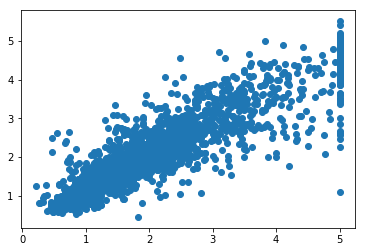

In [17]:
plt.scatter(y_test,predictions.flatten())